Import the libraries

In [1]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the data

In [2]:
data = s.loadmat('./data.mat')
x=np.array(data['X'])
y=np.array(data['yval'])
print(x.shape)
print(y.shape)

(307, 2)
(307, 1)


Plot the data

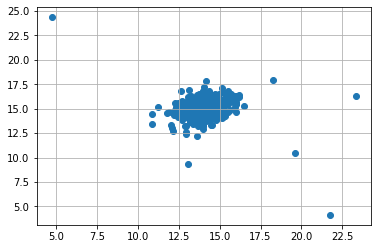

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
plt.show()

Find outliers and color them in red. You need to choose your own epsilon

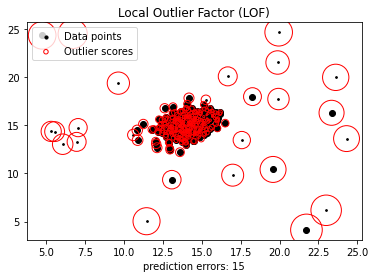

In [8]:
from sklearn.neighbors import LocalOutlierFactor
X_outliers = np.random.uniform(low=5, high=25, size=(20, 2))
X_t = np.r_[x, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X_t), dtype=int)
ground_truth[-n_outliers:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_t)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(x[:,0],x[:,1],c='k')
plt.scatter(X_t[:, 0], X_t[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_t[:, 0], X_t[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()